In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.datasets
from math import floor


((768, 1024, 3), dtype('uint8'))

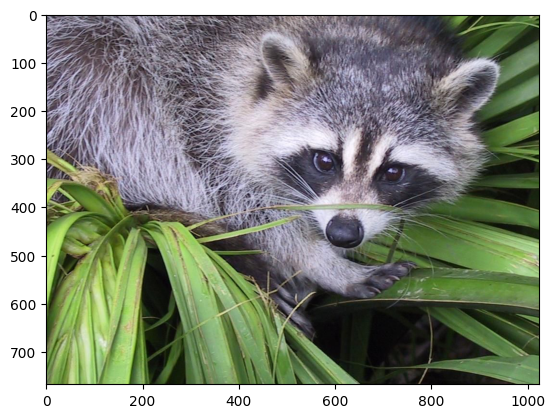

In [2]:
# Test image
face = scipy.datasets.face()
plt.imshow(face)

# The image is 768 pixels high, 1024 pixels wide and has 3 bands (R,G,B)
face.shape, face.dtype

In [3]:
# To access an individual pixel you can just index it, it will return 3 values the RGB components
face[0,0]

# The image is not writable by default
#face.flags

array([121, 112, 131], dtype=uint8)

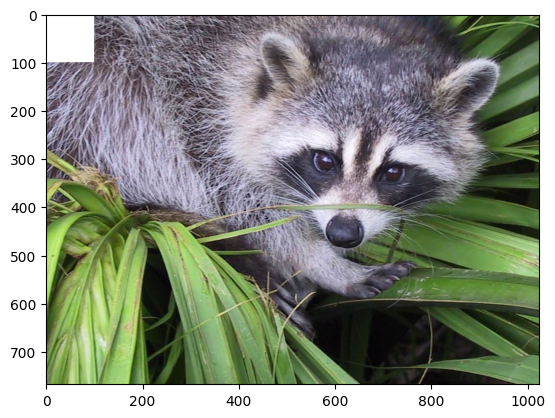

In [4]:
temp = face.copy()

for i in range(100):
    for j in range(100):
        temp[i, j] = [255, 255, 255]
        
plt.imshow(temp)

In [5]:
# We can assume that the data is only one array of with*height
def sub2ind(width, row, col):
    return row*width + col


def ind2sub(width, ind):
    row = (ind / width)
    col = (ind % width)
    return (floor(row), floor(col))

# We need a copy to modify it
temp = face.copy()
height, width, channels = temp.shape

print(f"This image has height {height} and width {width} with {channels} channels")

This image has height 768 and width 1024 with 3 channels


In [6]:
sub2ind(width, 1, 1023)

2047

In [7]:
ind2sub(width, 2047)

(1, 1023)